In [1]:
import os
os.chdir("C:/Users/Pooja Kathe/Desktop/linear_regression dataset/house-prices-advanced-regression-techniques (1)")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
from sklearn.linear_model import LinearRegression

In [2]:
train=pd.read_csv("train.csv")

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

### Analysis on the target variable

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


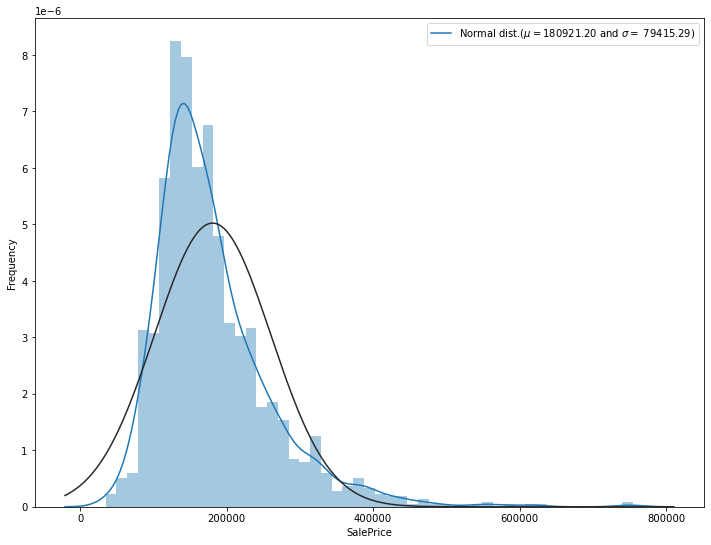

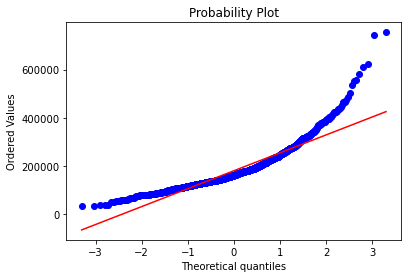

In [5]:
plt.subplots(figsize=(12,9))
sns.distplot(train["SalePrice"],fit=stats.norm)

## get the fitted paramter used by the function 
(mu,sigma)=stats.norm.fit(train["SalePrice"])

## plot dist 
plt.legend(['Normal dist.($\mu= ${:.2f} and $\sigma= $ {:.2f})'.format(mu,sigma)],loc="best")
plt.ylabel("Frequency")

## probabity plot
fig=plt.figure()
stats.probplot(train["SalePrice"],plot=plt)
plt.show()

##### the target is right skewed.now ew need  to tranform this variable and make it normal distribution

### Use of a log funtion  is the most common way to make a normal distribution. We will do that in the  follwing Section

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


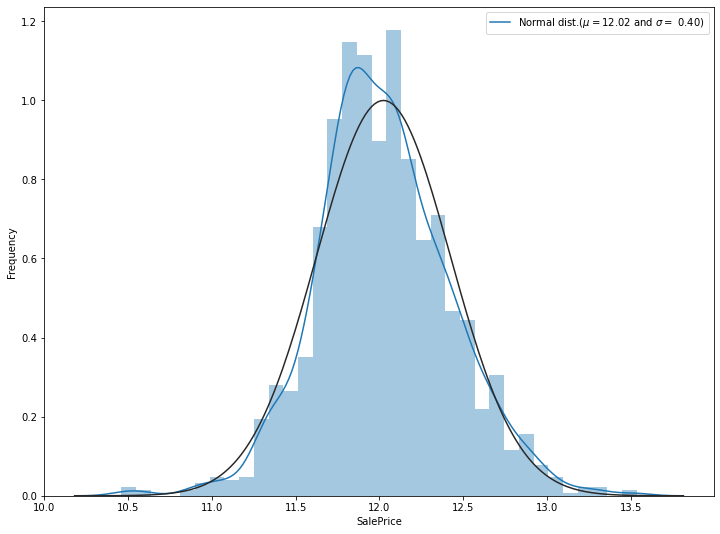

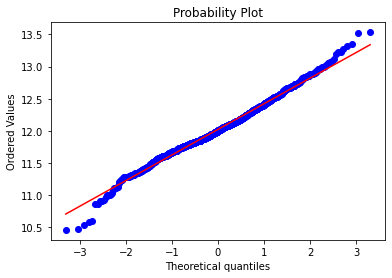

In [6]:
## we use log which is a part of numpy library
train["SalePrice"]=np.log1p(train["SalePrice"])

## check againe for normal distribution 
plt.subplots(figsize=(12,9))
sns.distplot(train["SalePrice"],fit=stats.norm)

## get the fitted paramter used by the function 
(mu,sigma)=stats.norm.fit(train["SalePrice"])

## plot  with the distribution 
plt.legend(['Normal dist.($\mu= ${:.2f} and $\sigma= $ {:.2f})'.format(mu,sigma)],loc="best")
plt.ylabel("Frequency")

## probabity plot
fig=plt.figure()
stats.probplot(train["SalePrice"],plot=plt)
plt.show()

In [7]:
## lets check the missing  dta if any
train.columns[train.isnull().any()]

Index(['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence',
       'MiscFeature'],
      dtype='object')

In [8]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
train.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

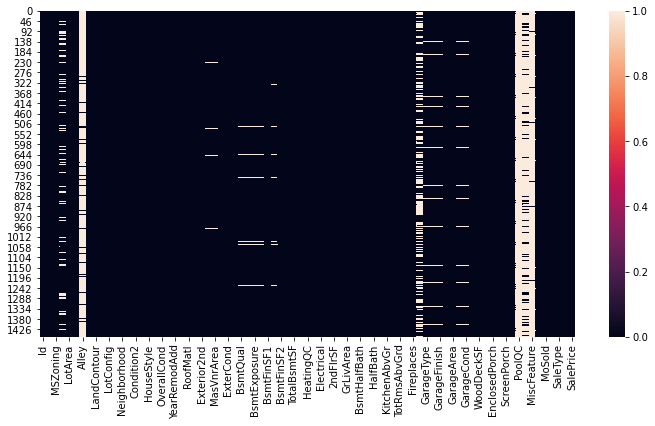

In [10]:
## plot of mossing value attribute
plt.figure(figsize=(12,6))
sns.heatmap(train.isnull())
plt.show()

In [11]:
# missing value count in each of the columns
Isnull=train.isnull().sum()/len(train)*100
Isnull=Isnull[Isnull>0]
Isnull.sort_values(inplace=True,ascending=False)
Isnull

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
MasVnrType       0.547945
Electrical       0.068493
dtype: float64

In [12]:
Isnull.count()

19

In [13]:
## vizulaization missing values 
# convert to dataframe
Isnull=Isnull.to_frame()

In [14]:
Isnull.columns=["count"]


In [15]:
Isnull.index.names=["Name"] # creating a columns that cantain name of variable

In [16]:
Isnull["Name"]=Isnull.index

In [17]:
Isnull

,count,Name
Name,,
PoolQC,99.520548,PoolQC
MiscFeature,96.301370,MiscFeature
Alley,93.767123,Alley
Fence,80.753425,Fence
FireplaceQu,47.260274,FireplaceQu
LotFrontage,17.739726,LotFrontage
GarageYrBlt,5.547945,GarageYrBlt
GarageType,5.547945,GarageType
GarageFinish,5.547945,GarageFinish


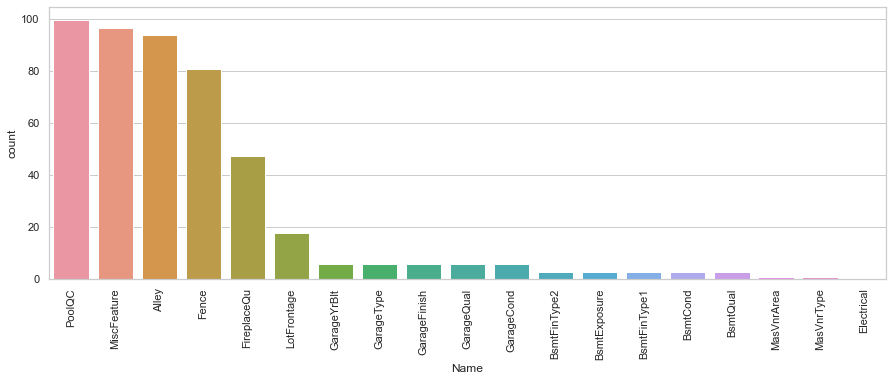

In [18]:
## plot missing values
plt.figure(figsize=(15,5))
sns.set(style= "whitegrid")
sns.barplot(x="Name",y="count",data=Isnull)
plt.xticks(rotation=90)
plt.show()

In [19]:
## Corealation between trin attrubute 
# septeted the which has only numeric value
train_corr=train.select_dtypes(include=[np.number])

In [20]:
train_corr.shape

(1460, 38)

In [21]:
del train_corr["Id"] # deleate this column becuse no need  for correlation plot

<AxesSubplot:>

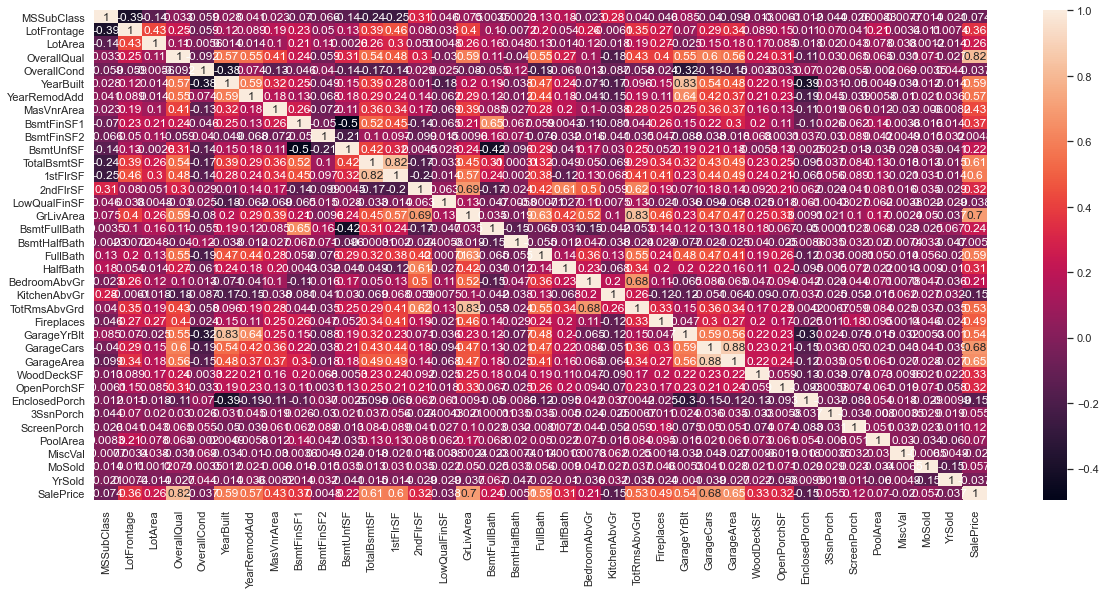

In [22]:
corr=train_corr.corr()
plt.subplots(figsize=(20,9))
sns.heatmap(corr,annot=True)

### TOP 50% corrlation train attribute with target variable

In [23]:
corr.index

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [24]:
corr[corr["SalePrice"]>0.5]["SalePrice"]

OverallQual     0.817185
YearBuilt       0.586570
YearRemodAdd    0.565608
TotalBsmtSF     0.612134
1stFlrSF        0.596981
GrLivArea       0.700927
FullBath        0.594771
TotRmsAbvGrd    0.534422
GarageYrBlt     0.541073
GarageCars      0.680625
GarageArea      0.650888
SalePrice       1.000000
Name: SalePrice, dtype: float64

In [25]:
corr.index[corr["SalePrice"]>0.5]

Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'SalePrice'],
      dtype='object')

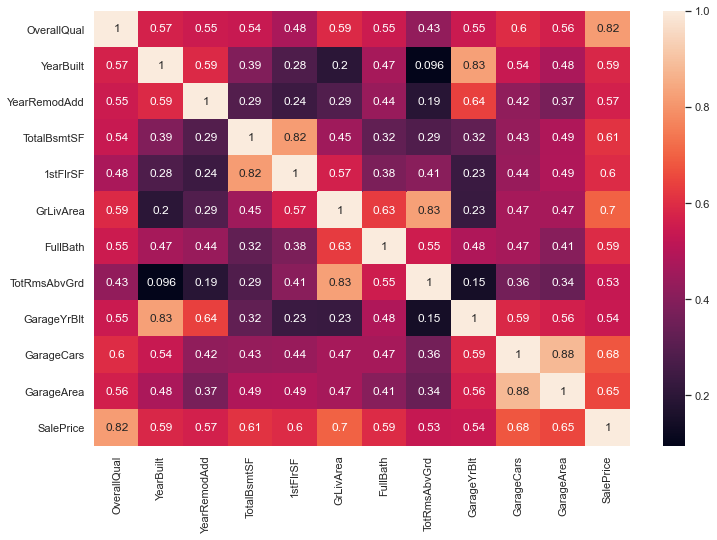

In [26]:
top_feature=corr.index[abs(corr["SalePrice"]>0.5)]
plt.subplots(figsize=[12,8])
top_corr=train[top_feature].corr()
sns.heatmap(top_corr,annot=True)
plt.show()

In [27]:
# overallqual is highiy correlation with saleprice
# unique value of overallqual
train.OverallQual.unique()

array([ 7,  6,  8,  5,  9,  4, 10,  3,  1,  2], dtype=int64)

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

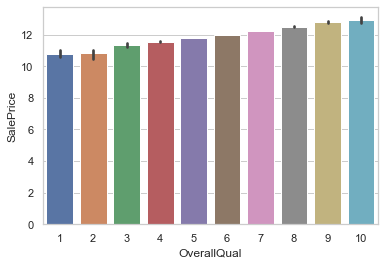

In [28]:
sns.barplot(train.OverallQual,train.SalePrice)

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

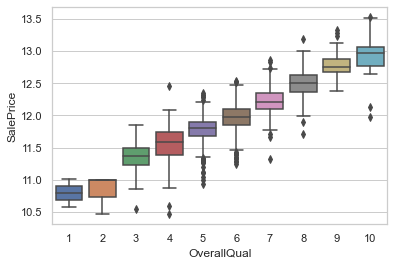

In [29]:
sns.boxplot(train.OverallQual,train.SalePrice)

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


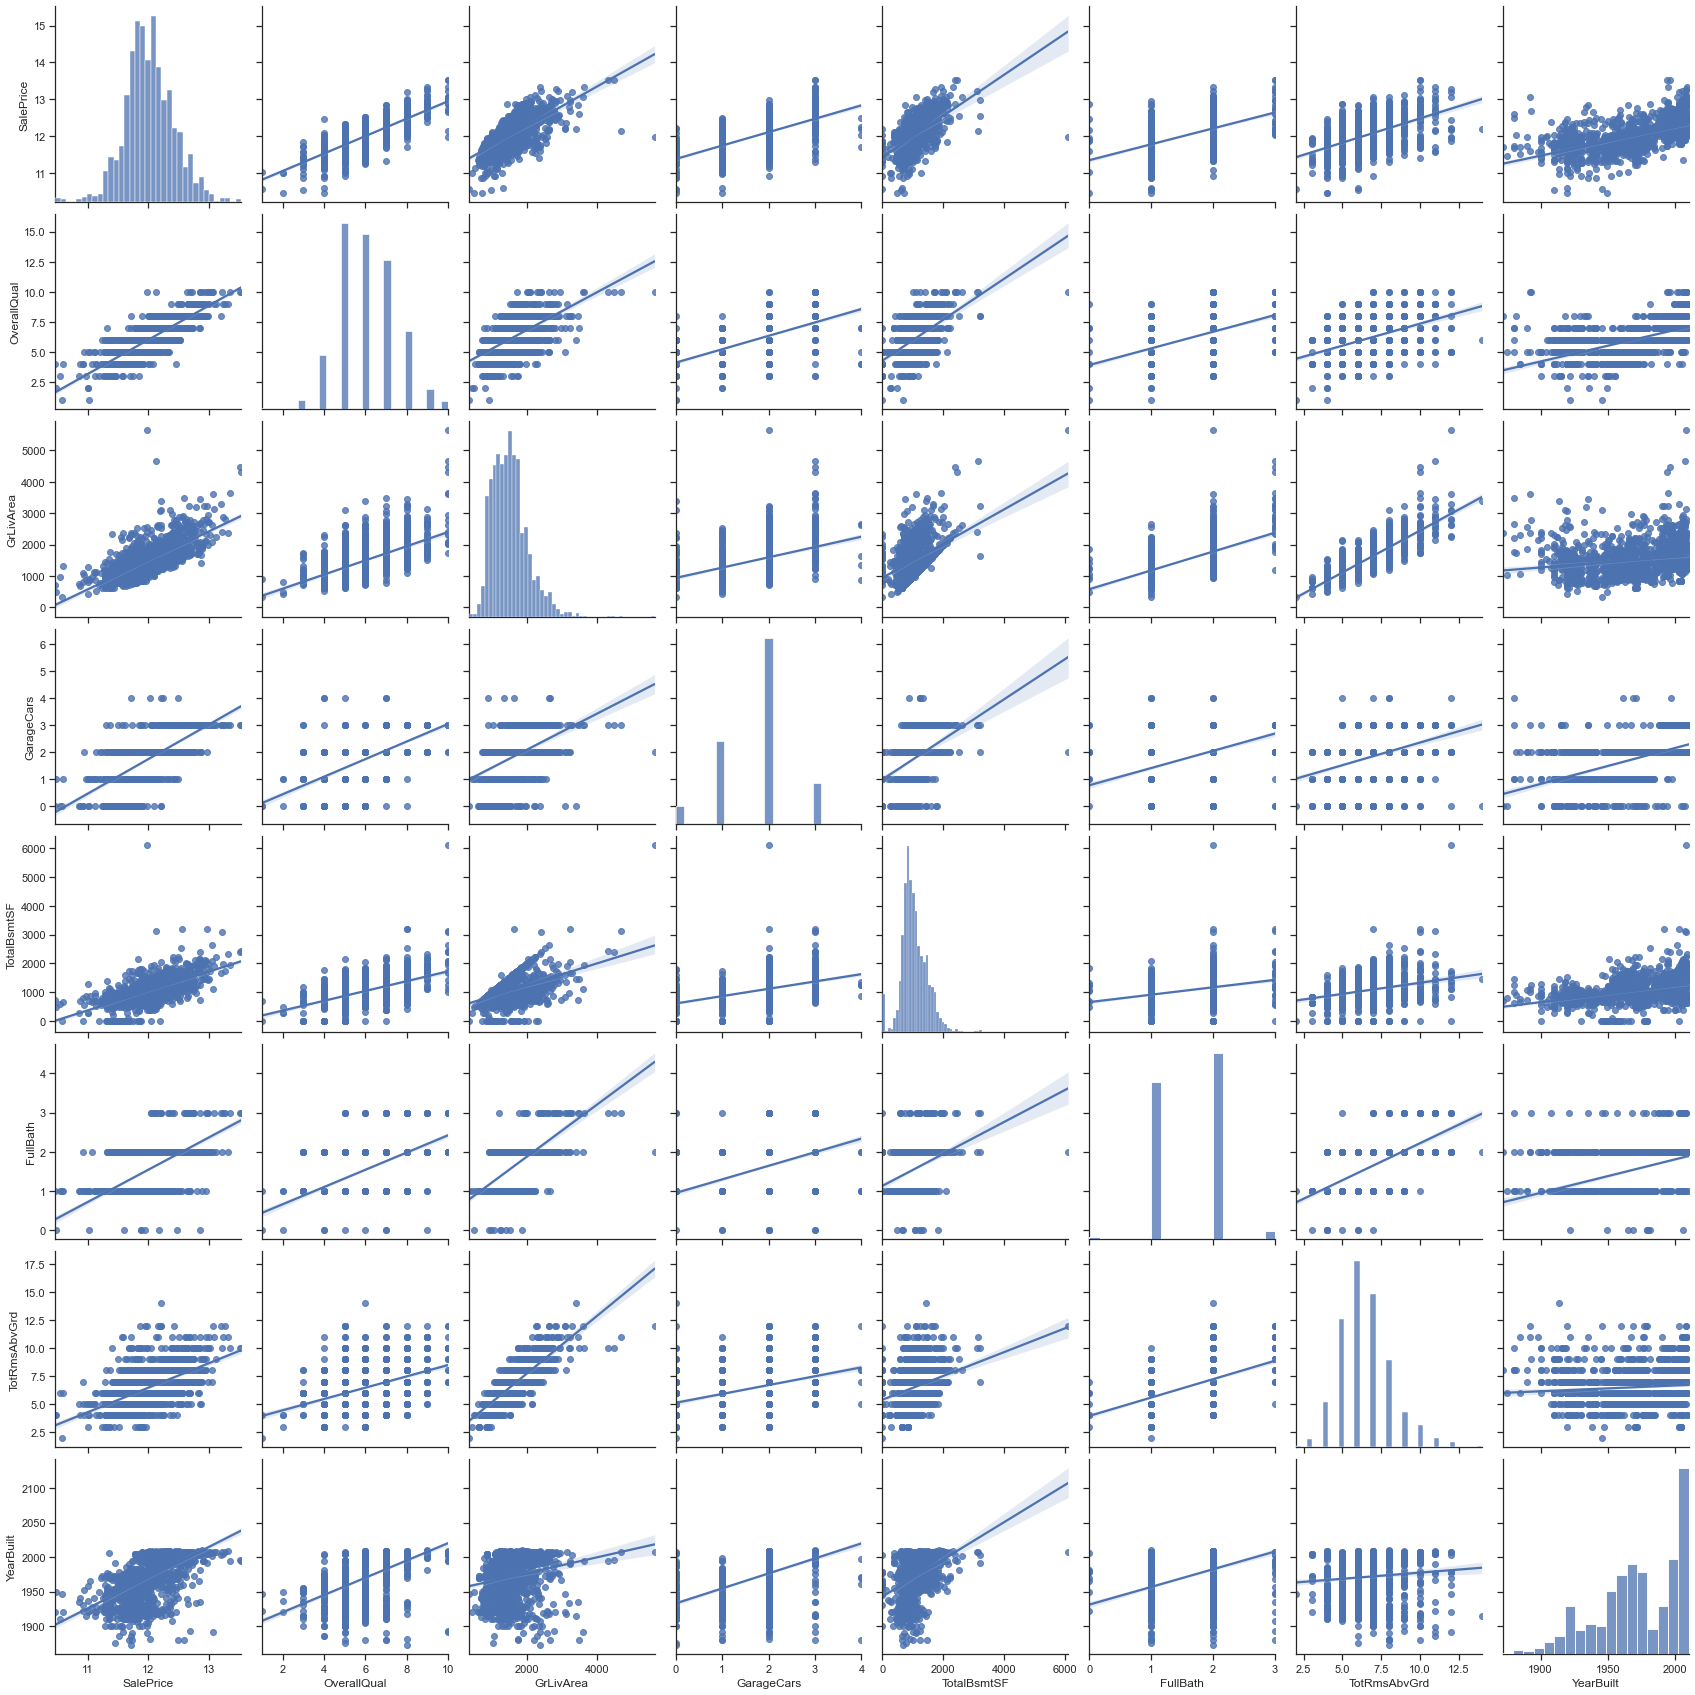

In [30]:
col=['SalePrice','OverallQual','GrLivArea','GarageCars','TotalBsmtSF','FullBath','TotRmsAbvGrd','YearBuilt']
sns.set(style="ticks")
sns.pairplot(train[col],size=3,kind="reg")

In [31]:
print("Find the most important fetures to the target")
corr=train.corr()
corr.sort_values(["SalePrice"],ascending=False,inplace=True)
corr.SalePrice

Find the most important fetures to the target


SalePrice        1.000000
OverallQual      0.817185
GrLivArea        0.700927
GarageCars       0.680625
GarageArea       0.650888
TotalBsmtSF      0.612134
1stFlrSF         0.596981
FullBath         0.594771
YearBuilt        0.586570
YearRemodAdd     0.565608
GarageYrBlt      0.541073
TotRmsAbvGrd     0.534422
Fireplaces       0.489450
MasVnrArea       0.430809
BsmtFinSF1       0.372023
LotFrontage      0.355879
WoodDeckSF       0.334135
OpenPorchSF      0.321053
2ndFlrSF         0.319300
HalfBath         0.313982
LotArea          0.257320
BsmtFullBath     0.236224
BsmtUnfSF        0.221985
BedroomAbvGr     0.209043
ScreenPorch      0.121208
PoolArea         0.069798
MoSold           0.057330
3SsnPorch        0.054900
BsmtFinSF2       0.004832
BsmtHalfBath    -0.005149
Id              -0.017942
MiscVal         -0.020021
OverallCond     -0.036868
YrSold          -0.037263
LowQualFinSF    -0.037963
MSSubClass      -0.073959
KitchenAbvGr    -0.147548
EnclosedPorch   -0.149050
Name: SalePr

#### imputing missing values 

In [32]:
## poolQc has missing value ratio of 99%,so there we fill None
train["PoolQC"]=train["PoolQC"].fillna("None")


In [33]:
train.PoolQC.value_counts()

None    1453
Gd         3
Fa         2
Ex         2
Name: PoolQC, dtype: int64

In [34]:
### for feature having 50% missing value again fill with None

In [35]:
train["MiscFeature"]=train["MiscFeature"].fillna("None")

In [36]:
train.MiscFeature.value_counts()

None    1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [37]:
train["Alley"]=train["Alley"].fillna("None")

In [38]:
train["Fence"]=train["Fence"].fillna("None")

In [39]:
train["FireplaceQu"]=train["FireplaceQu"].fillna("None")

In [40]:
## Groupby neighborhood and fill in missing value b the median LotFrontage of all the neghborhood
train["LotFrontage"]=train.groupby("Neighborhood")["LotFrontage"].transform(lambda x:x.fillna(x.median()))

### OR
##train.groupby("Neghborhoo")["LotFrontage"].fillna(train.groupby("Neighborhood")["LotFrontage"].median())b

In [41]:
train.LotFrontage.describe()

count    1460.000000
mean       70.199658
std        22.431902
min        21.000000
25%        60.000000
50%        70.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [42]:
## gargetype.gargefinish,garagequland gaeragecond will replace themwith none
for col in["GarageType","GarageFinish","GarageQual","GarageCond"]:
    train[col]=train[col].fillna(int(0))

In [43]:
for col in["GarageYrBlt","GarageArea","GarageCars"]:
    train[col]=train[col].fillna(int(0))

In [44]:
for col in["BsmtFinType2","BsmtExposure","BsmtFinType1","BsmtCond","BsmtQual"]:
    train[col]=train[col].fillna("None")

In [45]:
train["MasVnrArea"]=train["MasVnrArea"].fillna(int(0))

In [46]:
train["MasVnrType"]=train["MasVnrType"].fillna("None")

In [47]:
train["Electrical"]=train["Electrical"].fillna(train["Electrical"]).mode()[0]

In [48]:
## remove utilities
train=train.drop(["Utilities"],axis=1)

<AxesSubplot:>

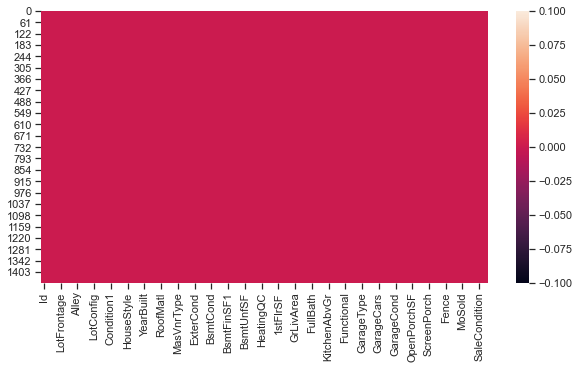

In [49]:
## check if there is any null value or not
plt.figure(figsize=(10,5))
sns.heatmap(train.isnull())

In [50]:
train_cat=train.select_dtypes(include="object").columns ## septing catrgorical variable


In [51]:
from sklearn.preprocessing import LabelEncoder

In [52]:
## label encoding categorical variable
for c in train_cat:
    lbl=LabelEncoder()
    lbl.fit(list(train[c].values))
    train[c]=lbl.transform(list(train[c].values))

In [53]:
train.shape

(1460, 80)

### preparing data  for prediction

In [54]:
y=train["SalePrice"]

In [55]:
del train["SalePrice"]

In [56]:
## take the values as X and Y
X=train.values
y=y.values

In [57]:
## split data into train and test 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [58]:
from sklearn.linear_model import LinearRegression

In [59]:
model=LinearRegression()

In [60]:
model.fit(X_train,y_train)

LinearRegression()

In [61]:
## prediction for a single data point
print("predicted values",(model.predict([X_test[142]])))
print("Äctual values",(y_test[142]))

predicted values [11.62770467]
Äctual values 11.767187766223199


In [62]:
train.head(142)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,3,65.0,8450,1,1,3,3,4,...,0,0,3,4,1,0,2,2008,8,4
1,2,20,3,80.0,9600,1,1,3,3,2,...,0,0,3,4,1,0,5,2007,8,4
2,3,60,3,68.0,11250,1,1,0,3,4,...,0,0,3,4,1,0,9,2008,8,4
3,4,70,3,60.0,9550,1,1,0,3,0,...,0,0,3,4,1,0,2,2006,8,0
4,5,60,3,84.0,14260,1,1,0,3,2,...,0,0,3,4,1,0,12,2008,8,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
137,138,90,3,82.0,11070,1,1,3,3,4,...,0,0,3,4,1,0,7,2006,8,3
138,139,60,3,73.0,9066,1,1,0,3,4,...,0,0,3,0,1,0,12,2008,8,4
139,140,60,3,65.0,15426,1,1,0,3,4,...,0,0,3,2,1,0,8,2009,8,4
140,141,20,3,70.0,10500,1,1,3,3,2,...,0,0,3,4,1,0,4,2010,4,4


In [63]:
y[0:142]

array([12.24769912, 12.10901644, 12.31717117, 11.84940484, 12.4292202 ,
       11.8706069 , 12.63460628, 12.20607765, 11.7745279 , 11.67844838,
       11.77144388, 12.75130259, 11.87757552, 12.54076115, 11.96400745,
       11.79056478, 11.9117083 , 11.40757606, 11.97666577, 11.84223641,
       12.69250619, 11.84510995, 12.34583894, 11.7745279 , 11.94471437,
       12.45410781, 11.8115549 , 12.63134365, 12.24289144, 11.13460362,
       10.59665973, 11.91405452, 12.10016198, 12.01673252, 12.53357982,
       12.64109979, 11.88449592, 11.93819974, 11.59911234, 11.31448672,
       11.98293534, 12.0435596 , 11.87757552, 11.77721864, 11.85652226,
       12.67576685, 12.38708918, 12.42801948, 11.63515195, 11.75195024,
       12.08391066, 11.64833884, 11.60824474, 12.86100121, 11.77529742,
       12.1034916 , 12.05815831, 12.1884228 , 12.99175571, 11.7352767 ,
       11.97035664, 11.5228857 , 12.2185001 , 11.84940484, 12.29911207,
       12.66666021, 12.10071769, 12.3282947 , 11.28979441, 12.32

In [64]:
## Score/Accuracy
print("Accuracy",model.score(X_test,y_test)*100)

Accuracy 89.26414516955816


In [65]:
## predction for whole data
pred_val=model.predict(X_test)

In [66]:
pred_val[0:5]

array([11.90170422, 12.16415065, 12.08840775, 11.4303284 , 11.69489971])

In [67]:
y_test[0:5]

array([11.93164238, 12.14950759, 12.05980911, 11.00211651, 11.71994776])

C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


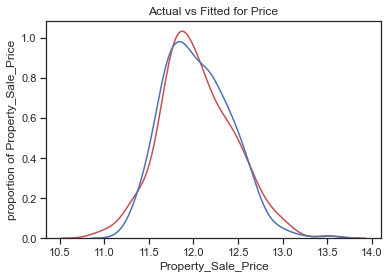

In [68]:
## distribution plot to compare actual VS predicted values for price
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Values")
sns.distplot(pred_val,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Property_Sale_Price")
plt.ylabel("proportion of Property_Sale_Price")
plt.show()

In [69]:
len(y_test)

292

Text(0, 0.5, 'Actual')

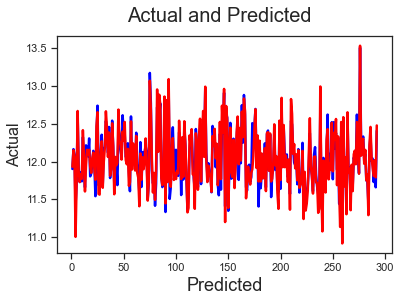

In [70]:
## Actual vr predicded 
## check for the forst 150 obsrv
c=[i for i in range (1,293,1)]
fig=plt.figure()
plt.plot(c,pred_val,color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_test,color="red",linewidth=2.5,linestyle="-")
fig.suptitle("Actual and Predicted",fontsize=20)
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=16)


Text(0, 0.5, 'Actual predicted')

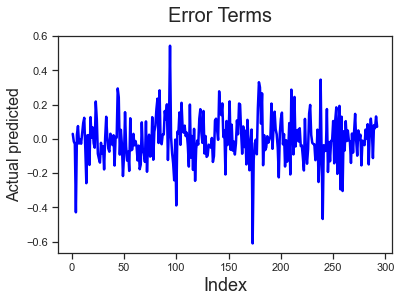

In [71]:
## error terms
c=[i for i in range(1,293,1)]
fig=plt.figure()
plt.plot(c,y_test-pred_val,color="blue",linewidth=2.5,linestyle="-")
fig.suptitle("Error Terms",fontsize=20)
plt.xlabel("Index",fontsize=18)
plt.ylabel("Actual predicted",fontsize=16)

In [72]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred_val)
r_squared=r2_score(y_test,pred_val)

In [73]:
from math import sqrt
rmse=sqrt(mse)

In [74]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 0.017990177641660245
root_mean_squared_error: 0.13412746788656024
r_squard_value 0.8926414516955816


### Polynomial Regreassion

In [75]:
from sklearn.preprocessing import PolynomialFeatures


In [76]:
pr=PolynomialFeatures(degree=2)

In [77]:
X_train_pr=pr.fit_transform(X_train)

In [78]:
X_test_pr=pr.fit_transform(X_test)

In [79]:
model_pr=model.fit(X_train_pr,y_train)

In [80]:
pred_val1=model.predict(X_test_pr)

In [81]:
pred_val1[0:5]

array([11.6009199 , 14.8729415 , 11.65059539, 10.91648862, 11.37552788])

In [82]:
y_test[0:5]

array([11.93164238, 12.14950759, 12.05980911, 11.00211651, 11.71994776])

In [83]:
from sklearn.metrics import mean_squared_error,r2_score
mse=mean_squared_error(y_test,pred_val1)
r_squared=r2_score(y_test,pred_val1)

In [84]:
from math import sqrt
rmse=sqrt(mse)

In [85]:
print("mean_squared_error:",mse)
print("root_mean_squared_error:",rmse)
print("r_squard_value",r_squared)

mean_squared_error: 20.613031248582253
root_mean_squared_error: 4.5401576237595815
r_squard_value -122.01074258859713


C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\Pooja Kathe\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


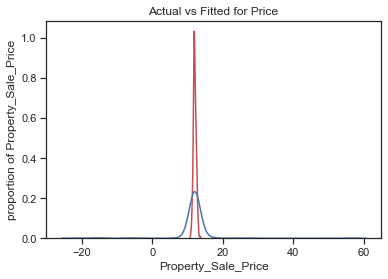

In [86]:
## distribution plot to compare actual VS predicted values for price
ax1=sns.distplot(y_test,hist=False,color="r",label="Actual Values")
sns.distplot(pred_val1,hist=False,color="b",label="Fitted Values",ax=ax1)
plt.title("Actual vs Fitted for Price")
plt.xlabel("Property_Sale_Price")
plt.ylabel("proportion of Property_Sale_Price")
plt.show()

Text(0, 0.5, 'Actual')

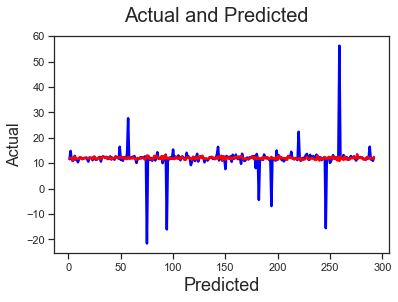

In [87]:
## Actual vr predicded 
## check for the forst 150 obsrv
c=[i for i in range (1,293,1)]
fig=plt.figure()
plt.plot(c,pred_val1,color="blue",linewidth=2.5,linestyle="-")
plt.plot(c,y_test,color="red",linewidth=2.5,linestyle="-")
fig.suptitle("Actual and Predicted",fontsize=20)
plt.xlabel("Predicted",fontsize=18)
plt.ylabel("Actual",fontsize=16)


## Cross Validation on Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lre=LinearRegression()

In [90]:
lre.fit(X_train,y_train)

LinearRegression()

In [91]:
lre.score(X_train,y_train)

0.8825287173511762

In [92]:
from sklearn.model_selection import cross_val_score

In [1]:
Rcross=cross_val_score(lre,X_train,y_train,cv=4)

NameError: name 'cross_val_score' is not defined

In [93]:
Rcross

NameError: name 'Rcross' is not defined

## Ridge Rrgression

In [96]:
from sklearn.linear_model import Ridge

In [97]:
RidgeModel=Ridge(alpha=0.1)

In [98]:
RidgeModel.fit(X_train,y_train)

Ridge(alpha=0.1)

In [99]:
yhat_Ridge=RidgeModel.predict(X_test)

In [100]:
print("predicted",yhat_Ridge[0:4])

predicted [11.9016472  12.16395124 12.08831996 11.43038585]


In [101]:
print("actual values",y_test[0:4])

actual values [11.93164238 12.14950759 12.05980911 11.00211651]


In [102]:
Rcross2=cross_val_score(RidgeModel,X_train,y_train,cv=4)

In [103]:
Rcross2

array([0.89205753, 0.5123418 , 0.88376404, 0.54067292])